In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def CubicNatural(x, y):
    m = x.size # m is the number of data points
    n = m-1
    a = np.zeros(m)
    b = np.zeros(n)
    c = np.zeros(m)
    d = np.zeros(n)
    for i in range(m):
        a[i] = y[i]
    h = np.zeros(n)
    for i in range(n):
        h[i] = x[i+1] - x[i]
    u = np.zeros(n)
    u[0] = 0
    for i in range(1, n):
        u[i] = 3*(a[i+1]-a[i])/h[i]-3*(a[i]-a[i-1])/h[i-1]
    s = np.zeros(m)
    z = np.zeros(m)
    t = np.zeros(n)
    s[0] = 1
    z[0] = 0
    t[0] = 0
    for i in range(1, n):
        s[i] = 2*(x[i+1]-x[i-1])-h[i-1]*t[i-1]
        t[i] = h[i]/s[i]
        z[i]=(u[i]-h[i-1]*z[i-1])/s[i]
    s[m-1] = 1
    z[m-1] = 0
    c[m-1] = 0
    for i in np.flip(np.arange(n)):
        c[i] = z[i]-t[i]*c[i+1]
        b[i] = (a[i+1]-a[i])/h[i]-h[i]*(c[i+1]+2*c[i])/3
        d[i] = (c[i+1]-c[i])/(3*h[i])
    return a, b, c, d

In [3]:
def CubicNaturalEval(w, x, coeff):
    m = x.size
    if w<x[0] or w>x[m-1]:
        print('error: spline evaluated outside its domain')
        return
    n = m-1
    p = 0
    for i in range(n):
        if w <= x[i+1]:
            break
        else:
            p += 1
    # p is the number of the subinterval w falls into, i.e., p=i means
    # w falls into the ith subinterval $(x_i,x_{i+1}), and therefore
    # the value of the spline at w is
    # a_i+b_i*(w-x_i)+c_i*(w-x_i)^2+d_i*(w-x_i)^3.
    a = coeff[0]
    b = coeff[1]
    c = coeff[2]
    d = coeff[3]
    return a[p]+b[p]*(w-x[p])+c[p]*(w-x[p])**2+d[p]*(w-x[p])**3

In [4]:
def diff(x, y):
    m = x.size #here m is the number of data points.
    a = np.zeros(m)
    for i in range(m):
        a[i] = y[i]
    for j in range(1, m):
        for i in np.flip(np.arange(j,m)):
            a[i] = (a[i]-a[i-1]) / (x[i]-x[i-(j)])
    return a

In [5]:
def newton(x, y, z):
    m = x.size # here m is the number of data points, not the degree
    # of the polynomial
    a = diff(x, y)
    sum = a[0]
    pr = 1.0
    for j in range(m-1):
        pr *= (z-x[j])
        sum += a[j+1]*pr
    return sum

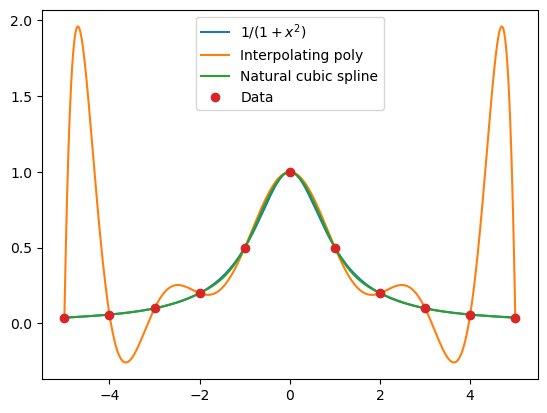

In [6]:
xaxis = np.linspace(-5, 5, 1000)
f = lambda x: 1/(1+x**2)
runge = f(xaxis)
xi = np.arange(-5, 6)
yi = f(xi)
coeff = CubicNatural(xi, yi)
naturalspline = np.array(list(map(lambda x: CubicNaturalEval(x, xi, coeff), xaxis)))
interp = newton(xi, yi, xaxis) # Interpolating polynomial for the data
plt.plot(xaxis, runge, label='$1/(1+x^2)$')
plt.plot(xaxis, interp, label='Interpolating poly')
plt.plot(xaxis, naturalspline, label='Natural cubic spline')
plt.plot(xi, yi, 'o', label='Data')
plt.legend(loc='upper center');

In [7]:
def CubicClamped(x, y, yprime_left, yprime_right):
    m = x.size # m is the number of data points
    n = m-1
    A = np.zeros(m)
    B = np.zeros(n)
    C = np.zeros(m)
    D = np.zeros(n)
    for i in range(m):
        A[i] = y[i]
    h = np.zeros(n)
    for i in range(n):
        h[i] = x[i+1] - x[i]
    u = np.zeros(m)
    u[0] = 3*(A[1]-A[0])/h[0]-3*yprime_left
    u[m-1] = 3*yprime_right-3*(A[m-1]-A[m-2])/h[m-2]
    for i in range(1, n):
        u[i] = 3*(A[i+1]-A[i])/h[i]-3*(A[i]-A[i-1])/h[i-1]
    s = np.zeros(m)
    z = np.zeros(m)
    t = np.zeros(n)
    s[0] = 2*h[0]
    t[0] = 0.5
    z[0] = u[0]/s[0]
    for i in range(1, n):
        s[i] = 2*(x[i+1]-x[i-1])-h[i-1]*t[i-1]
        t[i] = h[i]/s[i]
        z[i] = (u[i]-h[i-1]*z[i-1])/s[i]
    s[m-1] = h[m-2]*(2-t[m-2])
    z[m-1] = (u[m-1]-h[m-2]*z[m-2])/s[m-1]
    C[m-1] = z[m-1]
    for i in np.flip(np.arange(n)):
        C[i] = z[i]-t[i]*C[i+1]
        B[i] = (A[i+1]-A[i])/h[i]-h[i]*(C[i+1]+2*C[i])/3
        D[i] = (C[i+1]-C[i])/(3*h[i])
    return A, B, C, D

In [8]:
def CubicClampedEval(w, x, coeff):
    m = x.size
    if w<x[0] or w>x[m-1]:
        print('error: spline evaluated outside its domain')
        return
    n = m-1
    p = 0
    for i in range(n):
        if w <= x[i+1]:
            break
        else:
            p += 1
    A = coeff[0]
    B = coeff[1]
    C = coeff[2]
    D = coeff[3]
    return A[p]+B[p]*(w-x[p])+C[p]*(w-x[p])**2+D[p]*(w-x[p])**3

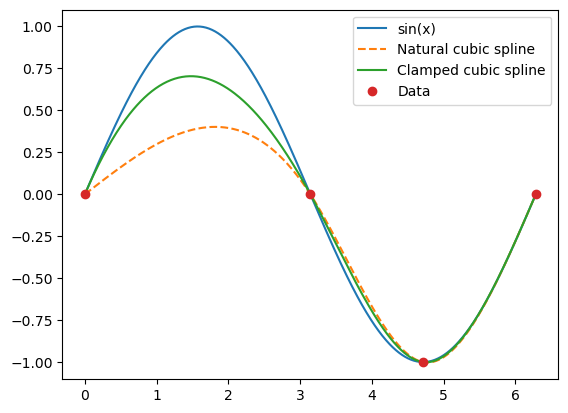

In [9]:
xaxis = np.linspace(0, 2*np.pi, 600)
f = lambda x: np.sin(x)
funct = f(xaxis)
xi = np.array([0, np.pi, 3*np.pi/2, 2*np.pi])
yi = f(xi)
coeff = CubicNatural(xi, yi)
naturalspline = np.array(list(map(lambda x: CubicNaturalEval(x, xi, coeff), xaxis)))
coeff = CubicClamped(xi, yi, 1, 1)
clampedspline = np.array(list(map(lambda x: CubicClampedEval(x, xi, coeff), xaxis)))

plt.plot(xaxis, funct, label='sin(x)')
plt.plot(xaxis, naturalspline, linestyle='--', label='Natural cubic spline')
plt.plot(xaxis, clampedspline, label='Clamped cubic spline')
plt.plot(xi, yi, 'o', label='Data')
plt.legend(loc='upper right');

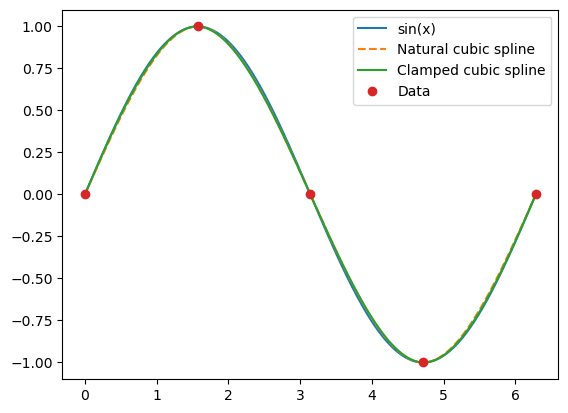

In [10]:
xaxis = np.linspace(0, 2*np.pi, 600)
f = lambda x: np.sin(x)
funct = f(xaxis)
xi = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
yi = f(xi)
coeff = CubicNatural(xi, yi)
naturalspline = np.array(list(map(lambda x: CubicNaturalEval(x, xi, coeff), xaxis)))
coeff = CubicClamped(xi, yi, 1, 1)
clampedspline = np.array(list(map(lambda x: CubicClampedEval(x, xi, coeff), xaxis)))

plt.plot(xaxis, funct, label='sin(x)')
plt.plot(xaxis, naturalspline, linestyle='--', label='Natural cubic spline')
plt.plot(xaxis, clampedspline, label='Clamped cubic spline')
plt.plot(xi, yi, 'o', label='Data')
plt.legend(loc='upper right');

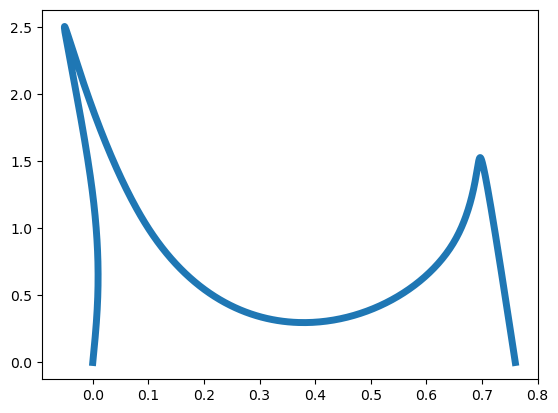

In [11]:
t = np.array([1,2,3,4,5,6,7,8])
x = np.array([0,0,-0.05,0.1,0.4,0.65,0.7,0.76])
y = np.array([0,1.25,2.5,1,0.3,0.9,1.5,0])
taxis = np.linspace(1, 8, 700)
coeff = CubicNatural(t, x)
xspline = np.array(list(map(lambda x: CubicNaturalEval(x, t, coeff), taxis)))
    
coeff = CubicNatural(t, y)
yspline = np.array(list(map(lambda x: CubicNaturalEval(x, t, coeff), taxis)))
    
plt.plot(xspline, yspline, linewidth=5);

In [12]:
w, h = plt.figaspect(2);
plt.figure(figsize=(w, h));

<Figure size 400x800 with 0 Axes>

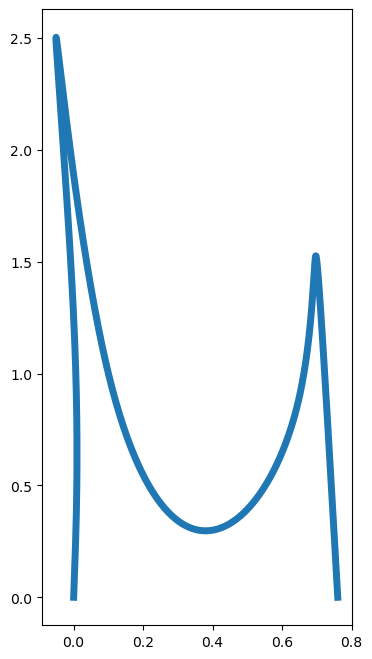

In [13]:
t = np.array([1,2,3,4,5,6,7,8])
x = np.array([0,0,-0.05,0.1,0.4,0.65,0.7,0.76])
y = np.array([0,1.25,2.5,1,0.3,0.9,1.5,0])
taxis = np.linspace(1, 8, 700)
coeff = CubicNatural(t, x)
xspline = np.array(list(map(lambda x: CubicNaturalEval(x, t, coeff), taxis)))
    
coeff = CubicNatural(t, y)
yspline = np.array(list(map(lambda x: CubicNaturalEval(x, t, coeff), taxis)))

w, h = plt.figaspect(2)
plt.figure(figsize=(w, h))
plt.plot(xspline, yspline, linewidth=5);